<a href="https://colab.research.google.com/github/HarshSrivastava12215211/Sentiment-analysis/blob/main/Sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tweepy transformers torch datasets nlp augly


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 23.8 MB/s eta 0:00:00
 

In [ ]:
import pandas as pd

def load_data(file_path):
    """
    Load dataset from a CSV file.

    Args:
        file_path (str): Path to the CSV file.

    Returns:
        pd.DataFrame: Loaded dataset as a DataFrame."""
    df = pd.read_csv('Data.csv', encoding='latin-1')
    df = df[["sentiment", "text"]]
    df["sentiment"] = df["sentiment"].map({0: "negative", 4: "positive"})
    return df


In [ ]:
import nlpaug.augmenter.word as naw

def augment_data(texts):
    aug = naw.SynonymAug(aug_src='wordnet')
    return [aug.augment(text) for text in texts]


In [ ]:
!pip install nlpaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 6.4 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.preprocessing import LabelEncoder


In [ ]:
def train_model(train_texts, train_labels):
    tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
    model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
    label_encoder = LabelEncoder()
    train_labels = label_encoder.fit_transform(train_labels)
    return model, tokenizer, label_encoder

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
def hyperparameter_tuning(model):
    param_grid = {'learning_rate': [1e-5, 3e-5, 5e-5], 'batch_size': [8, 16]}
    search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=5, cv=3)
    return search.best_params_

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [ ]:

def evaluate_model(true_labels, predicted_labels):
    accuracy = accuracy_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels, average='weighted')
    cm = confusion_matrix(true_labels, predicted_labels)
    return accuracy, f1, cm

In [ ]:
def predict_sentiment(model, tokenizer, text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    sentiment = torch.argmax(outputs.logits, dim=-1).item()
    return "positive" if sentiment == 1 else "negative"


In [ ]:
def retrain_model(model, new_data, new_labels):
    return train_model(new_data, new_labels)

In [ ]:
if __name__ == "__main__":
    df = load_data("Data.csv")
    df["text"] = augment_data(df["text"])  # Augment data
    model, tokenizer, label_encoder = train_model(df["text"], df["sentiment"])  # Train model

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import nltk

# Download the required NLTK resource
nltk.download('averaged_perceptron_tagger_eng')

import pandas as pd
import nlpaug.augmenter.word as naw
# ... (rest of your code)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


**New Code**

In [1]:
import re #regex
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
from nltk.stem import WordNetLemmatizer #Lemmatization is the process of reducing the word (running -> run, cats-> cat)

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"

df = pd.read_csv("Data.csv",encoding='latin-1')

In [7]:
df.head()

,sentiment,ID,Time,Query,People,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [9]:
df.isna().sum()

,0
sentiment,0
ID,0
Time,0
Query,0
People,0
text,0


In [10]:
df['sentiment'].unique()

array([0, 4])

[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]

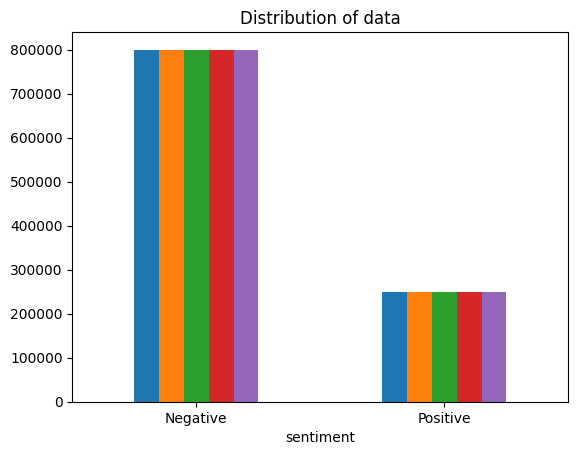

In [11]:
ax = df.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

In [12]:
text = list(df['text'])
sentiment = list(df['sentiment'])

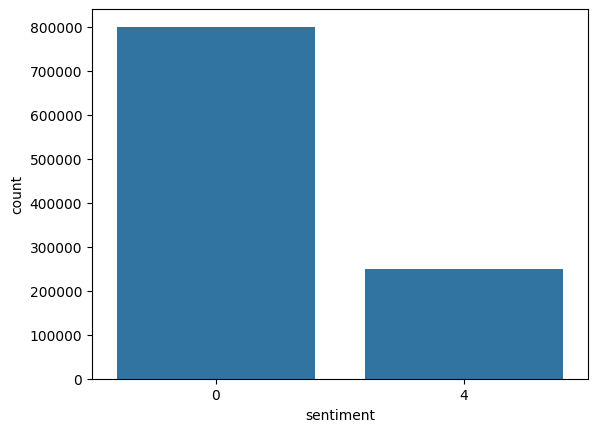

In [13]:
sns.countplot(x='sentiment', data=df);

In [16]:
data=df[['text','sentiment']]

In [17]:
pos_data = data[data['sentiment'] == 1]
neg_data = data[data['sentiment'] == 0]

In [18]:
pos_data = pos_data.iloc[:int(20000)]
neg_data = neg_data.iloc[:int(20000)]

In [19]:
dataset = pd.concat([pos_data, neg_data])

In [20]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

,text
19995,one more day of holidays
19996,feeling so down right now .. i hate you damn h...
19997,"geez,i hv to read the whole book of personalit..."
19998,i threw my sign at donnie and he bent over to ...
19999,@heather2711 good thing i didn't find any then...


In [21]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s',
             'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [22]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

,text
0,upset can't update facebook texting it... migh...
1,@kenichan dived many times ball. managed save ...
2,whole body feels itchy like fire
3,"@nationwideclass no, it's not behaving all. i'..."
4,@kwesidei not whole crew


In [23]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

,text
19995,one day holidays
19996,feeling right hate damn humprey
19997,geezi hv read whole book personality types emb...
19998,threw sign donnie bent over get but thingee ma...
19999,heather2711 good thing didnt find none ones li...


In [24]:
# Cleaning and removing repeating character
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

,text
19995,one day holidays
19996,feeling right hate damn humprey
19997,geezi hv read whole book personality types emb...
19998,threw sign donnie bent over get but thingee ma...
19999,heather21 good thing didnt find none ones like...


In [25]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

,text
19995,one day holidays
19996,feeling right hate damn humprey
19997,geezi hv read whole book personality types emb...
19998,threw sign donnie bent over get but thingee ma...
19999,heather21 good thing didnt find none ones like...


In [26]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

,text
19995,one day holidays
19996,feeling right hate damn humprey
19997,geezi hv read whole book personality types emb...
19998,threw sign donnie bent over get but thingee ma...
19999,heather good thing didnt find none ones like c...


In [27]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

,text
0,"[upset, cant, update, facebook, texting, it, m..."
1,"[kenichan, dived, many, times, ball, managed, ..."
2,"[whole, body, feels, itchy, like, fire]"
3,"[nationwideclass, no, its, not, behaving, all,..."
4,"[kwesidei, not, whole, crew]"


In [28]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

,text
0,"[upset, cant, update, facebook, texting, it, m..."
1,"[kenichan, dived, many, times, ball, managed, ..."
2,"[whole, body, feels, itchy, like, fire]"
3,"[nationwideclass, no, its, not, behaving, all,..."
4,"[kwesidei, not, whole, crew]"


In [30]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [31]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

,text
0,"[upset, cant, update, facebook, texting, it, m..."
1,"[kenichan, dived, many, times, ball, managed, ..."
2,"[whole, body, feels, itchy, like, fire]"
3,"[nationwideclass, no, its, not, behaving, all,..."
4,"[kwesidei, not, whole, crew]"


Splitting into X and Y

In [33]:
X=data.text
y=data.sentiment

In [36]:
neg_data = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(neg_data));



<Figure size 2000x2000 with 0 Axes>

In [37]:
# WordCloud for positive tweets
pos_data = data['text'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(pos_data))
plt.figure(figsize = (20,20))


<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

Modelling

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.15,
                                                    random_state =42)

In [39]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectorizer.fit(X_train)
print('No. of feature_words: ', len(vectorizer.vocabulary_))

No. of feature_words:  500000


In [40]:
X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)

Evaluate the **model**

In [41]:
def model_Evaluate(model):

    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']

    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title("Confusion Matrix", fontdict = {'size':18}, pad = 20)

**Naive Baiye's**

In [42]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)

BernoulliNB()

              precision    recall  f1-score   support

           0       0.89      0.91      0.90    119977
           4       0.68      0.64      0.66     37310

    accuracy                           0.84    157287
   macro avg       0.78      0.77      0.78    157287
weighted avg       0.84      0.84      0.84    157287



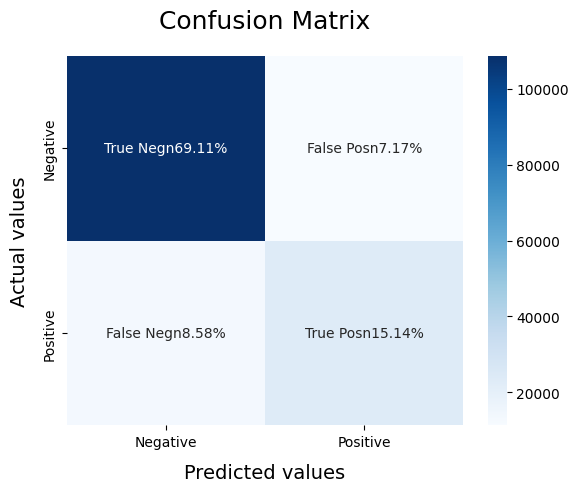

In [43]:
model_Evaluate(BNBmodel)

In [45]:
y_pred1 = BNBmodel.predict(X_test)

**SVM**

In [47]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)

LinearSVC()

              precision    recall  f1-score   support

           0       0.89      0.93      0.91    119977
           4       0.73      0.63      0.68     37310

    accuracy                           0.86    157287
   macro avg       0.81      0.78      0.79    157287
weighted avg       0.85      0.86      0.85    157287



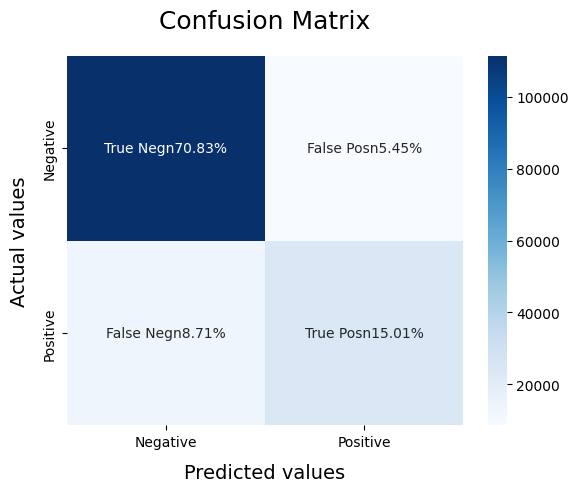

In [48]:
model_Evaluate(SVCmodel)

**Logistic Regression**

In [49]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)

LogisticRegression(C=2, max_iter=1000, n_jobs=-1)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92    119977
           4       0.78      0.61      0.69     37310

    accuracy                           0.87    157287
   macro avg       0.83      0.78      0.80    157287
weighted avg       0.86      0.87      0.86    157287



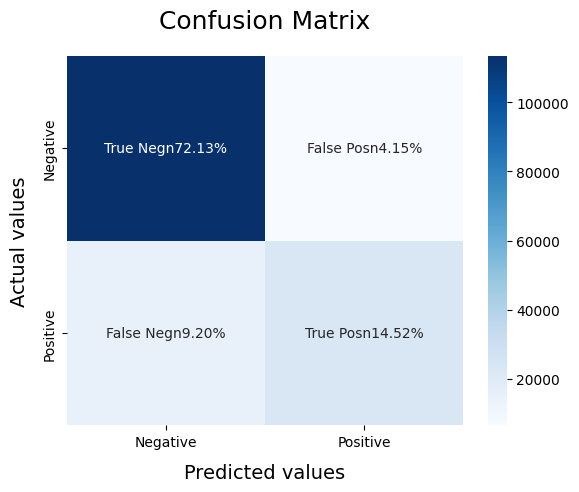

In [50]:
model_Evaluate(LRmodel)